# SIMPLE LINEAR REGRESSION


In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
data= pd.read_csv("salary.csv")

In [6]:
data

,years,salary
0,1.1,39343
1,1.3,46205
2,1.5,41526
3,2.0,45698
4,2.2,41256
5,2.9,41236
6,3.0,89654
7,3.2,41256
8,4.0,41230
9,4.1,78965


In [7]:
data.shape

(30, 2)

In [8]:
#checking missing values
data.isnull().values.any()

False

In [9]:
#splitting our data
train_set, test_set = train_test_split(data, test_size= 0.2, random_state= 42)

In [10]:
df_copy = train_set.copy()

In [11]:
#exploratory data analysis
data.describe()

,years,salary
count,30.000000,30.000000
mean,5.506667,46695.566667
std,2.765419,25326.597602
min,1.100000,12540.000000
25%,3.400000,39763.000000
50%,5.150000,41391.000000
75%,7.700000,47567.500000
max,10.500000,120000.000000


In [12]:
#correlations between each of the columns.
data.corr()

,years,salary
years,1.000000,0.013628
salary,0.013628,1.000000


<AxesSubplot:xlabel='years', ylabel='salary'>

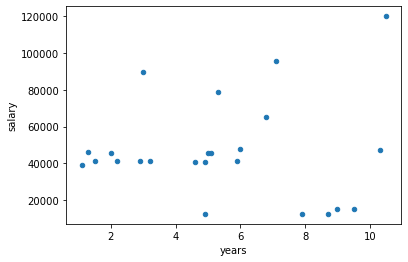

In [13]:
df_copy.plot.scatter(x='years', y='salary')

The first step in finding a linear regression equation is to determine if there is a relationship between the two variables. We can do this by using the Correlation coefficient and scatter plot. 


C:\Users\LENOVO\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='years', ylabel='salary'>

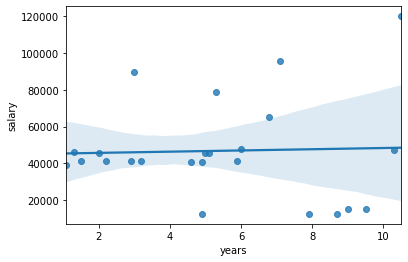

In [14]:
# Regression plot
sns.regplot('years', # Horizontal axis
           'salary', # Vertical axis
           data=df_copy)

# Building the Model


In order to build our model, we need to make some changes to our training set – we have to migrate our label column to its own data frame. Our label column, or as I like to refer to the answer column, is the column that we want to predict when we run our model. 

In [15]:
train_set_full = train_set

train_set = train_set.drop(["salary"], axis=1)

In [16]:
train_labels = df_copy["salary"]

In [17]:
#Now we can create our model with our training data.
lin_reg = LinearRegression()
lin_reg.fit(train_set, train_labels)


#Here we create a new instance of the LinearRegression class and on that instance call the fit method with two parameters:
#train_set is the data frame which would have the inputs – the number of years of experience.
#train_labels is the series (data frame with one column) that has our answers to the input – the salary amount for specified 
#years of experience.

LinearRegression()

In [18]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)




Coefficients:  [330.8543215]
Intercept:  45055.877034291654


In [19]:
#To get a prediction from an input, we need to call the predict function. We can pass in a pandas series object to return an 
#array of prediction values.

salary_pred = lin_reg.predict(train_set)

salary_pred


array([48463.67654574, 47934.30963134, 46677.06320964, 45419.81678794,
       45783.75654159, 46809.40493824, 46015.35456664, 46710.14864179,
       46677.06320964, 47669.62617414, 45485.98765224, 45552.15851654,
       48033.56592779, 45717.58567729, 47404.94271694, 48198.99308854,
       47007.91753114, 48529.84741004, 47305.68642049, 46114.61086309,
       46577.80691319, 46743.23407394, 47041.00296329, 46048.43999879])

# Scoring our Model
Now that we have our model, how do we know that it’s a good one? Or that it can work with data not in our training set? This is where the test set that we created earlier comes in to check the accuracy


In [20]:
print(salary_pred)
print(train_set_full["salary"])


[48463.67654574 47934.30963134 46677.06320964 45419.81678794
 45783.75654159 46809.40493824 46015.35456664 46710.14864179
 46677.06320964 47669.62617414 45485.98765224 45552.15851654
 48033.56592779 45717.58567729 47404.94271694 48198.99308854
 47007.91753114 48529.84741004 47305.68642049 46114.61086309
 46577.80691319 46743.23407394 47041.00296329 46048.43999879]
28     47500
24     12540
12     41023
0      39343
4      41256
16     78546
5      41236
13     45871
11     12569
22     12654
1      46205
2      41526
25     15154
3      45698
21     95874
26     15211
18     41256
29    120000
20     65239
7      41256
10     41023
14     45698
19     47590
6      89654
Name: salary, dtype: int64


In [21]:
##This calculates the coefficient of determination or the r^2 of the model
r2_score(train_set_full["salary"], salary_pred)

0.0012615267796237672

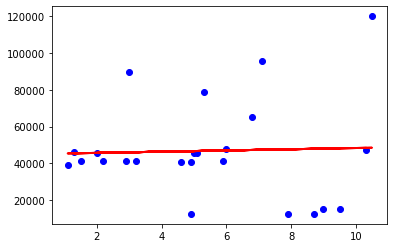

In [22]:
#plots against our test data.

plt.scatter(train_set_full["years"], train_set_full["salary"],  color='blue')
plt.plot(train_set_full["years"], salary_pred, color='red', linewidth=2)